<a href="https://colab.research.google.com/github/rb5653-creator/MLDA.Experiments/blob/main/Roshini13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis

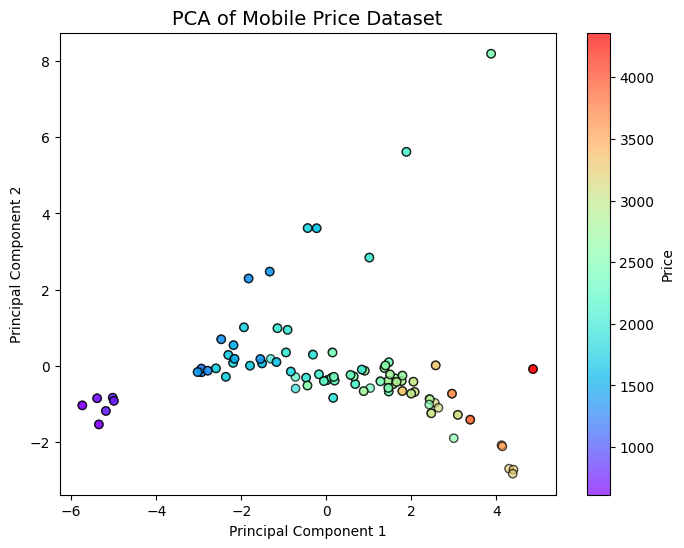


🔍 Explained variance ratio (importance of each component):
[0.48235109 0.19473348]


In [ ]:
# 🧮 Step 5: Separate features (X) and target (y)
# Using 'Price' as the target since 'price_range' column does not exist
X = df.drop(['Product_id', 'Price'], axis=1)  # Drop ID and target
y = df['Price']

# ⚙️ Step 6: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 Step 7: Apply PCA (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 📊 Step 8: Visualize PCA result
plt.figure(figsize=(8,6))
plt.title('PCA of Mobile Price Dataset', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', edgecolor='k', alpha=0.7)
plt.colorbar(label='Price')
plt.show()

# 📈 Step 9: Explained Variance
print("\n🔍 Explained variance ratio (importance of each component):")
print(pca.explained_variance_ratio_)


Naive Bayes Classification

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files
import zipfile, os

# Step 2: Upload ZIP file
print("📁 Please upload your 'mobile price.zip' file")
uploaded = files.upload()

# Step 3: Extract ZIP
zip_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("mobile_price_data")

print("\n✅ Files extracted successfully!")
print(os.listdir("mobile_price_data"))

# Step 4: Load dataset
file_list = os.listdir("mobile_price_data")
csv_file = [f for f in file_list if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join("mobile_price_data", csv_file))

print("\n📋 Sample Data:")
print(df.head())

# Step 5: Convert continuous Price → categorical price_range
df['price_range'] = pd.cut(
    df['Price'],
    bins=[0, 1500, 2500, 3500, np.inf],
    labels=['Low', 'Medium', 'High', 'Premium']
)

print("\n🏷️ Price Range Distribution:")
print(df['price_range'].value_counts())

# Step 6: Prepare features and target
X = df.drop(['Product_id', 'Price', 'price_range'], axis=1)
y = df['price_range']

# Step 7: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = model.predict(X_test)

print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📁 Please upload your 'mobile price.zip' file


Saving mobile price.zip to mobile price (4).zip

✅ Files extracted successfully!
['Cellphone.csv', 'Cellphone.xlsx']

📋 Sample Data:
   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  

🏷️ Price Range Dist

Support Vector Machines

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import zipfile, os

# Step 2: Upload ZIP file
print("📁 Please upload your 'mobile price.zip' file")
uploaded = files.upload()

# Step 3: Extract ZIP file
zip_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("mobile_price_data")

print("\n✅ Files extracted successfully!")
print(os.listdir("mobile_price_data"))

# Step 4: Load dataset
file_list = os.listdir("mobile_price_data")
csv_file = [f for f in file_list if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join("mobile_price_data", csv_file))

print("\n📋 Sample Data:")
print(df.head())

# Step 5: Convert continuous 'Price' → categorical 'price_range'
df['price_range'] = pd.cut(
    df['Price'],
    bins=[0, 1500, 2500, 3500, np.inf],
    labels=['Low', 'Medium', 'High', 'Premium']
)

print("\n🏷️ Price Range Distribution:")
print(df['price_range'].value_counts())

# Step 6: Define features and target
X = df.drop(['Product_id', 'Price', 'price_range'], axis=1)
y = df['price_range']

# Step 7: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Create and train the SVM model
model = SVC(kernel='linear')  # Try 'rbf' or 'poly' for better results
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate model
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📁 Please upload your 'mobile price.zip' file


Saving mobile price.zip to mobile price (5).zip

✅ Files extracted successfully!
['Cellphone.csv', 'Cellphone.xlsx']

📋 Sample Data:
   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  

🏷️ Price Range Dist

Hierarchical Classification

Saving mobile price.zip to mobile price (11).zip
✅ Files extracted successfully!
['Cellphone.csv', 'Cellphone.xlsx']

📋 Sample Data:
   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  

🏷️ Price Range Dist

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


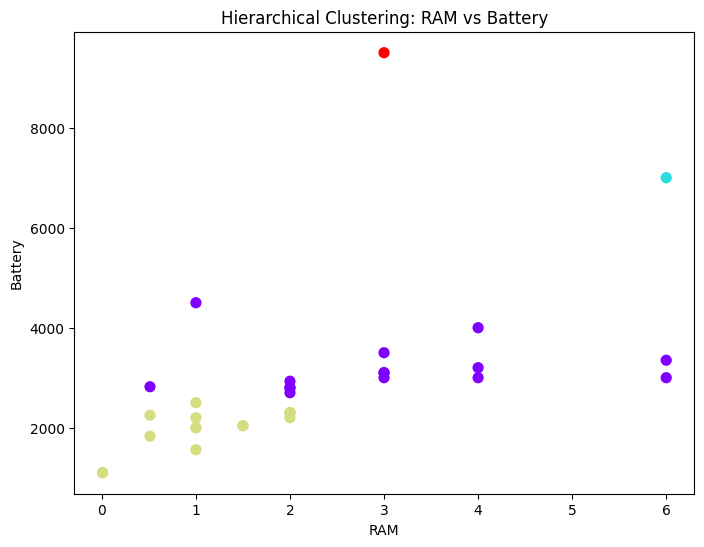

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files
import zipfile
import io

# Step 2: Upload ZIP file
uploaded = files.upload()

# Step 3: Extract ZIP
for filename in uploaded.keys():
    if filename.endswith(".zip"):
        with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
            zip_ref.extractall()
            print("✅ Files extracted successfully!")
            print(zip_ref.namelist())

# Step 4: Load dataset
df = pd.read_csv("Cellphone.csv")
print("\n📋 Sample Data:")
print(df.head())

# Step 5: Create 'price_range' column
df['price_range'] = pd.cut(
    df['Price'],
    bins=[0, 1500, 2500, 3500, np.inf],
    labels=['Low', 'Medium', 'High', 'Premium']
)
print("\n🏷️ Price Range Distribution:")
print(df['price_range'].value_counts())

# Step 6: Select features (example: all except Product_id, Price, price_range)
X = df.drop(['Product_id', 'Price', 'price_range'], axis=1)
y = df['price_range']

# Step 7: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Apply Hierarchical Clustering
hc_model = AgglomerativeClustering(n_clusters=4, linkage='ward')  # 4 price ranges
y_hc_numeric = hc_model.fit_predict(X_test)

# Step 9: Map numeric clusters to actual price_range labels using pandas mode
labels_mapping = {}
y_test_series = y_test.reset_index(drop=True)
y_hc_series = pd.Series(y_hc_numeric)

for cluster in y_hc_series.unique():
    mask = (y_hc_series == cluster)
    most_common = y_test_series[mask].mode()[0]  # pandas mode supports strings
    labels_mapping[cluster] = most_common

y_hc_mapped = y_hc_series.map(labels_mapping)

# Step 10: Classification report and confusion matrix
print("\n📊 Classification Report (mapped clusters):")
print(classification_report(y_test_series, y_hc_mapped))

cm = confusion_matrix(y_test_series, y_hc_mapped)
print("\n🧩 Confusion Matrix:\n", cm)

# Step 11: Optional: visualize clusters (example: Price vs RAM)
plt.figure(figsize=(8,6))
plt.scatter(X_test['ram'], X_test['battery'], c=y_hc_numeric, cmap='rainbow', s=50)
plt.title("Hierarchical Clustering: RAM vs Battery")
plt.xlabel("RAM")
plt.ylabel("Battery")
plt.show()


K Means Clustering

Saving mobile price.zip to mobile price (16).zip
📋 Sample Data:
   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  
Silhouette Score for k=2: 0.3240
Silhouette Score for k=3: 0.3579
Silhouette Score for k=

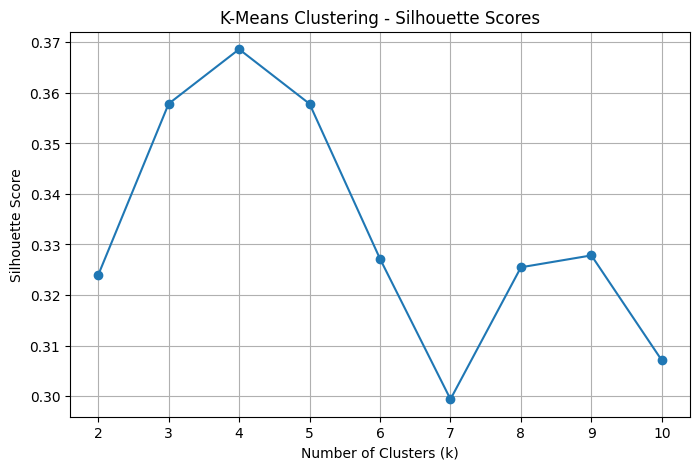

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv("Cellphone.csv")
print("📋 Sample Data:")
print(df.head())

# Step 4: Drop non-numeric columns (like Product_id) for clustering
X = df.drop(['Product_id'], axis=1)

# Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply K-Means for k = 2 to 10 and calculate silhouette scores
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Step 7: Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('K-Means Clustering - Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


Cluster Evaluation using Python

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()

# Step 3: Load dataset (choose the correct CSV name)
df = pd.read_csv("Cellphone.csv")
print("📋 Sample Data:")
print(df.head())

# Step 4: Drop non-numeric or target columns
X = df.select_dtypes(include='number').drop(['Product_id'], axis=1)

# Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply K-Means clustering
k = 4  # 4 clusters for 4 price ranges
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Step 7: Evaluate clusters
silhouette = silhouette_score(X_scaled, y_pred)
davies_bouldin = davies_bouldin_score(X_scaled, y_pred)
calinski_harabasz = calinski_harabasz_score(X_scaled, y_pred)

# Step 8: Display results
print("📊 Cluster Evaluation Results:")
print(f"→ Silhouette Score: {silhouette:.3f}  (Higher is better, range: -1 to 1)")
print(f"→ Davies-Bouldin Index: {davies_bouldin:.3f}  (Lower is better)")
print(f"→ Calinski-Harabasz Index: {calinski_harabasz:.3f}  (Higher is better)")


Saving mobile price.zip to mobile price (17).zip
📋 Sample Data:
   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  
📊 Cluster Evaluation Results:
→ Silhouette Score: 0.369  (Higher is better, range: -1 to 

Decision Tree Algorithm

Saving mobile price.zip to mobile price (20).zip
📋 Sample Data:
   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  

📊 Classification Report:
               precision    recall  f1-score   support

       

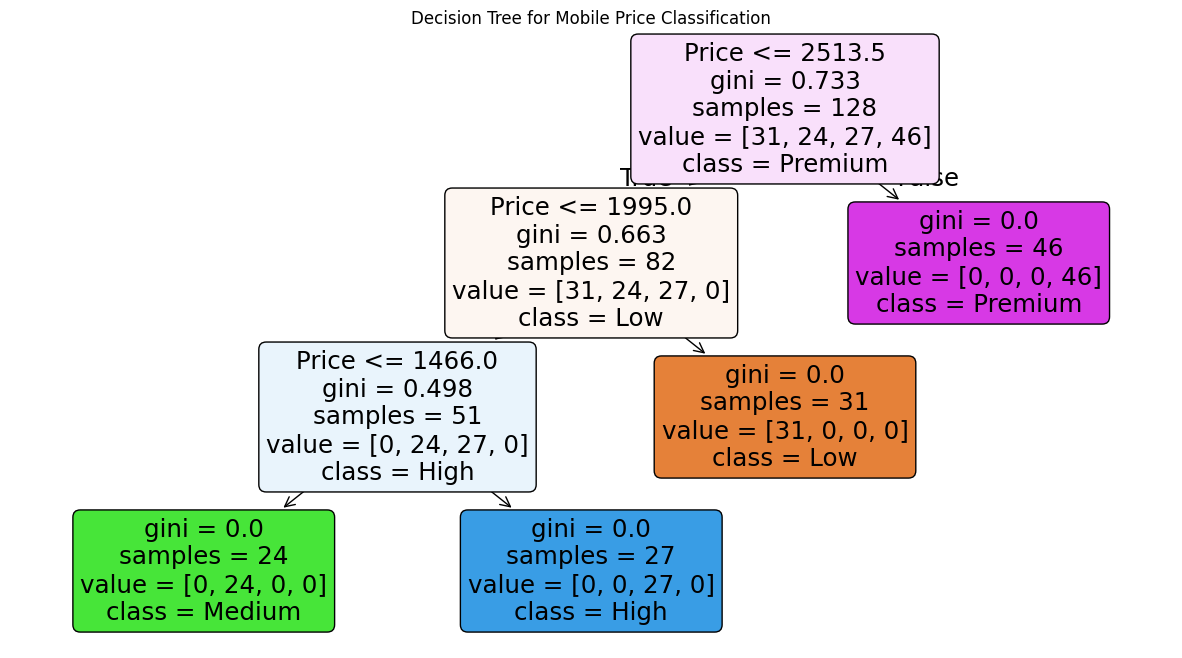

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv("Cellphone.csv")
print("📋 Sample Data:")
print(df.head())

# Step 4: Create price ranges manually
bins = [0, 1500, 2000, 2500, df['Price'].max()]
labels = ['Low', 'Medium', 'High', 'Premium']
df['price_range'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Step 5: Split dataset into features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and train Decision Tree model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate model
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Visualize Decision Tree
plt.figure(figsize=(15,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=labels, rounded=True)
plt.title("Decision Tree for Mobile Price Classification")
plt.show()


Random Forest Algorithm

Saving mobile price.zip to mobile price (22).zip
📋 Sample Data:
   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  

📊 Classification Report:
               precision    recall  f1-score   support

       

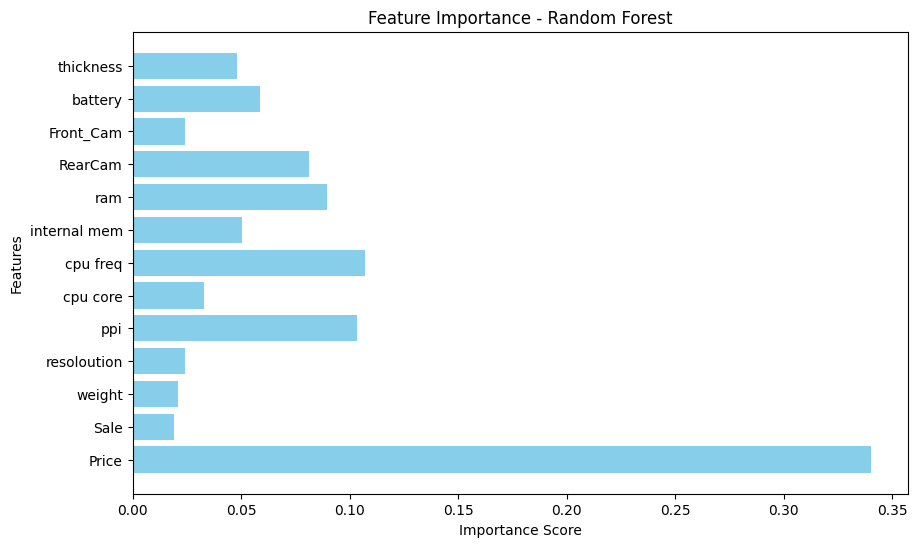

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv("Cellphone.csv")  # replace with your actual CSV name
print("📋 Sample Data:")
print(df.head())

# Step 4: Create price range target based on 'Price' column
def categorize_price(price):
    if price < 1500:
        return 'Low'
    elif price < 2000:
        return 'Medium'
    elif price < 2500:
        return 'High'
    else:
        return 'Premium'

df['price_range'] = df['Price'].apply(categorize_price)

# Step 5: Split dataset into features and target
X = df.drop(['price_range', 'Product_id'], axis=1)  # drop target + Product_id
y = df['price_range']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predictions and evaluation
y_pred = model.predict(X_test)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Artificial Neural Network (ANN)



In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()

# Step 3: Load dataset
df = pd.read_csv("Cellphone.csv")  # Replace with your CSV file name
print("📋 Sample Data:")
print(df.head())

# Step 4: Encode target column
# Check if target column exists; if not, you need to create one from Price
# For demonstration, we create price ranges based on 'Price'
bins = [0, 5000, 10000, 15000, 25000]  # Adjust according to your dataset
labels = ['Low', 'Medium', 'High', 'Premium']
df['price_range'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Encode target labels as integers
le = LabelEncoder()
y = le.fit_transform(df['price_range'])

# Step 5: Prepare feature matrix
X = df.drop(['price_range', 'Product_id', 'Price'], axis=1)  # Drop non-feature columns

# Step 6: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Convert target to categorical
y_cat = keras.utils.to_categorical(y, num_classes=len(labels))

# Step 8: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

# Step 9: Build ANN model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(labels), activation='softmax')
])

# Step 10: Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 11: Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_split=0.1)

# Step 12: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Model Accuracy: {accuracy*100:.2f}%")

# Step 13: Sample predictions
predictions = model.predict(X_test)
pred_classes = le.inverse_transform(np.argmax(predictions, axis=1))
print("\nSample Predictions (first 5):")
for i in range(5):
    print(f"Predicted: {pred_classes[i]}, Actual: {le.inverse_transform([np.argmax(y_test[i])])[0]}")


Saving mobile price.zip to mobile price (23).zip
📋 Sample Data:
   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5025 - loss: 1.0785 - val_accuracy: 0.4615 - val_loss: 1.1182
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8053 - loss: 0.7483 - val_accuracy: 0.6923 - val_loss: 0.8678
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9590 - loss: 0.5064 - val_accuracy: 1.0000 - val_loss: 0.6680
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.4185 - val_accuracy: 1.0000 - val_loss: 0.5062
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.2732 - val_accuracy: 1.0000 - val_loss: 0.3820
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.2466 - val_accuracy: 1.0000 - val_loss: 0.2808
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.1740 - val_accuracy: 1.0000 - val_loss: 0.2091
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1153 - val_accuracy: 1.0000 - 